In [1]:
# importing dependencies
import matplotlib.pyplot as plt
# lib used for working with graphs and networks
import networkx as nx
import numpy as np
import pandas as pd

# Matrices refresher

Matrix multiplication is one of the most important operations in deep learning. It is used in almost every deep learning model. In this notebook, we will learn how to multiply matrices, and how to implement this in Python.

We will also learn about what matrices actually are. They are really an important concept as basically any deep learning or graphical computing uses them to output its result.

So, what is a matrix ?

This could be summarized as something as simple as _a rectangle of numbers_. For example, the following is a matrix of 2 rows and 3 columns (2 by 3 matrix):

$$
\begin{bmatrix}
1 & 2 & 3 \\
7 & 8 & 9 \\
\end{bmatrix}
$$

Matrix is just a compact representation of a bunch of numbers. They allow to do batch operations on them, which is very useful in deep learning because it is an optimized way of doing heavy computation.

The _dimensions_ of a matrix tell its size: the number of rows and columns, _in that order_.

Each element of a matrix is identified by naming the row and the column in which it appears. For example, in the matrix _M_ above, the element in the first row and second column is 2. This would be written as $M_{1,2} = 2$.

## Simple data representation using a matrix

Matrices, besides graphical applications and deep learning, are used in many other fields, such as economics, statistics, physics, and more. They are a very useful way of representing data, even in day-to-day life. For instance, you could compare inventories between two shops by using matrices representing the stocks that are currently present in each shop.

Let's take the example of bus routes that connect 3 cities and that are intially represented by a graph:

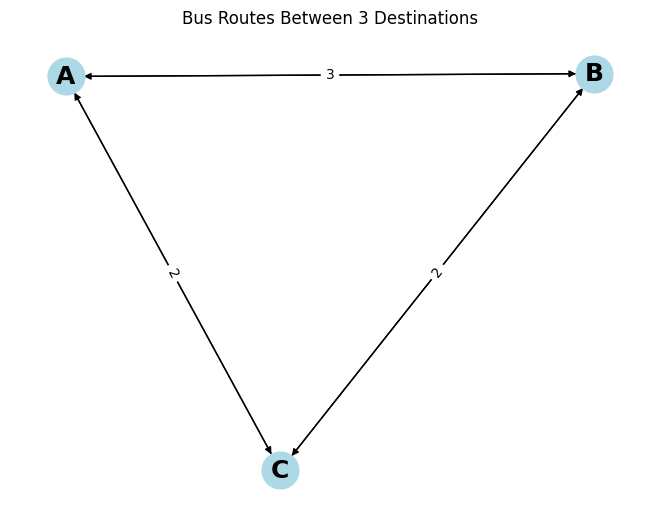

In [2]:
# Initialize a directed graph using NetworkX
G = nx.DiGraph()

# Add nodes to the graph, representing destinations A, B, and C
G.add_nodes_from(['A', 'B', 'C'])

# Add edges to the graph, representing bus routes between destinations,
# for example, ('A', 'B') represents a route from A to B
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'A'), ('B', 'A'), ('C', 'B'), ('A', 'C')])

# Add additional edges to the graph to represent more bus routes;
# each tuple (x, y, z) represents a route from x to y with weight z;
# The weight can represent the number of routes between two destinations
additional_edges = [('A', 'B', 2), ('B', 'C', 1), ('C', 'A', 1)]

# Add the additional edges with weights
for edge in additional_edges:
    src, dest, weight = edge
    if G.has_edge(src, dest):
        # If the edge already exists, update its weight
        G[src][dest]['weight'] = G[src][dest].get('weight', 1) + weight
    else:
        # Otherwise, add the edge with the given weight
        G.add_edge(src, dest, weight=weight)

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Positions for all nodes
labels = nx.get_edge_attributes(G, 'weight')  # Get edge labels (weights)
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700, font_size=18, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)  # Add labels to edges
plt.title("Bus Routes Between 3 Destinations")
plt.show()

In [3]:
# now let's represent the graph as an adjacency matrix,
# an adjacency matrix is a way of representing a graph using a square matrix of numbers

# Initialize a zero matrix with dimensions 3x3 (for 3 destinations)
# Rows represent "From", and columns represent "To"
matrix = np.zeros((3, 3), dtype=int)

# Create a mapping for destinations to matrix indices
dest_to_index = {'A': 0, 'B': 1, 'C': 2}

# Populate the matrix based on the graph
for src, dest, data in G.edges(data=True):
    row = dest_to_index[src]  # Get row index for the source destination
    col = dest_to_index[dest]  # Get column index for the target destination
    matrix[row, col] = data.get('weight', 1)  # Fill in the number of routes

# Convert the matrix to a DataFrame for better visualization
df_matrix = pd.DataFrame(matrix, index=['From A', 'From B', 'From C'], columns=['To A', 'To B', 'To C'])
df_matrix

,To A,To B,To C
From A,0,3,1
From B,1,0,2
From C,2,1,0


As you can see, representing this graph data as a matrix allows us to easily answer questions such as:

- "how many buses are there from city A to city B ?"
- "what city has the most outgoing buses ?"
- "what city has the most incoming buses ?"
- etc.

## Adding matrices together

As long as the matrices to add or subtract have the same dimensions, you can add/substract them together by adding/substracting their corresponding elements:

$$
\begin{bmatrix}
1 & 2 \\
3 & 4 \\
\end{bmatrix}
+
\begin{bmatrix}
5 & 6 \\
7 & 8 \\
\end{bmatrix}
=
\begin{bmatrix}
1+5 & 2+6 \\
3+7 & 4+8 \\
\end{bmatrix}
=
\begin{bmatrix}
6 & 8 \\
10 & 12 \\
\end{bmatrix}
$$

Mathematicians have not come to an agreement as to how to add/subtract matrices that don't have the same dimensions.

## Zero matrix

A matrix with all elements equal to zero is called a _zero matrix_. It is usually represented by the symbol $O$. A subscript can be used to specify the dimensions of the matrix:

$$O_{2,3} = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ \end{bmatrix}$$

When adding a zero matrix and a matrix $M$, the result is $M$.

Also, multiplying any `m * n` matrix by 0 results in a zero matrix of the same dimensions.

Moreover, multiplying any scalar by a zero matrix will give you back the same zero matrix.

## Matrices opposites

The _opposite_ of a matrix $M$ is a matrix that, when added to $M$, gives a zero matrix. It is usually represented by the symbol $-M$.

## Multiplying matrices by scalar values

Multiplying a matrix by a real number, e.g. a _scalar_ value, is very simple: you just multiply each element of the matrix by the scalar value.

You can also think of matrix multiplication by a scalar as repeated addition of the matrix to itself.

### Closure property of multiplication applied to matrices

Mutliplying a matrix by a scalar also follows the closure property of multiplication: the result of multiplying a matrix by a scalar is always a matrix, that has the same dimensions as the original matrix.

### Associative property of multiplication applied to matrices

Multiplying a matrix by a scalar also follows the associative property of multiplication: the result of multiplying a matrix by a scalar is the same, regardless of the order of the multiplication. For an example:

$$\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ \end{bmatrix} \times 2 \times 3$$

... is the same as 

$$2 \times \begin{bmatrix} 3 & 3 & 3 \\ 3 & 3 & 3 \\ \end{bmatrix}$$

... or

$$3 \times \begin{bmatrix} 2 & 2 & 2 \\ 2 & 2 & 2 \\ \end{bmatrix}$$

... or even

$$6 \times \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ \end{bmatrix}$$

### Distributive property of multiplication applied to matrices

Multiplying a matrix by a scalar also follows the distributive property of multiplication. For an example:

$$2 \times (\begin{bmatrix} 1 & 2 \\ 3 & 4 \\ \end{bmatrix} + \begin{bmatrix} 5 & 6 \\ 7 & 8 \\ \end{bmatrix})$$

... is the same as

$$(2 \times \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ \end{bmatrix}) + (2 \times \begin{bmatrix} 5 & 6 \\ 7 & 8 \\ \end{bmatrix})$$

Also, a matrix can be distributed over scalar addition, as in:

$$(2 + 3) \times \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ \end{bmatrix}$$

... which can be represented as:

$$2 \times \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ \end{bmatrix} + 3 \times \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ \end{bmatrix}$$

## Multiplying matrices together

You can multiply two matrices together if the number of columns of matrix `A` is the same as the number of rows of `matrix `B`. 

The resulting matrix `C` will have the same number of rows as `A` and the same number of columns as `B`.

The steps for matrix multiplication are:

1. confirm that the number of columns of `A` is the same as the number of rows of `B`
2. initialize a zero matrix `C` with the same number of rows as `A` and the same number of columns as `B`
3. for each element $i,j$ of `C`:
    - multiply each element of row $i$ of `A` by each element of column $j$ of `B`
    - add all the results together to get the value of element $i,j$ of `C`

### Example

Let's take the following matrices:

$$A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ \end{bmatrix}$$

$$B = \begin{bmatrix} 5 & 6 \\ 7 & 8 \\ \end{bmatrix}$$

The number of columns of `A` is the same as the number of rows of `B`, so we can multiply them together.

The resulting matrix `C` will have the same number of rows as `A` and the same number of columns as `B`.

So, `C` will be a 2 by 2 matrix.

Let's initialize `C` to a zero matrix:

$$C = \begin{bmatrix} 0 & 0 \\ 0 & 0 \\ \end{bmatrix}$$

Now, let's calculate the value of each element of `C`:

$$C_{1,1} = A_{1,1} \times B_{1,1} + A_{1,2} \times B_{2,1} = 1 \times 5 + 2 \times 7 = 19$$

$$C_{1,2} = A_{1,1} \times B_{1,2} + A_{1,2} \times B_{2,2} = 1 \times 6 + 2 \times 8 = 22$$

$$C_{2,1} = A_{2,1} \times B_{1,1} + A_{2,2} \times B_{2,1} = 3 \times 5 + 4 \times 7 = 43$$

$$C_{2,2} = A_{2,1} \times B_{1,2} + A_{2,2} \times B_{2,2} = 3 \times 6 + 4 \times 8 = 50$$

We now have matrix `C`:

$$C = \begin{bmatrix} 19 & 22 \\ 43 & 50 \\ \end{bmatrix}$$

## Matrices as transformations of the plane

2 by 2 matrices can be used to represent transformations of the plane.

You'd consider two essential vectors on a coordinate plane:

$$VERTICAL = \begin{bmatrix} 0 \\ 1 \\ \end{bmatrix}$$

The vertical vector is a vector that points straight up. The number at the top of the vector is the vertical component of the vector. The number at the bottom of the vector is the horizontal component of the vector.

$$HORIZONTAL = \begin{bmatrix} 1 \\ 0 \\ \end{bmatrix}$$

Any point on the plane is the weighted sum of these two vectors. A weighted sum is a sum where each term is multiplied by a corresponding weight before being added together:

`x * HORIZONTAL + y * VERTICAL`.

### Identity transformations

_Identity transformations_ map each point of the plane to itself.

They are represented as:

$$I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ \end{bmatrix}$$

The 1st colum says "what is the transformation you want to apply to the horizontal vector ?". The 2nd column says "what is the transformation you want to apply to the vertical vector ?".

## Linear transformations

A 2 by 2 matrix will represent a linear transformation.

A linear transformation will always map the origin on to itself.

A linear transformation will always map a line on to another line.